<a href="https://colab.research.google.com/github/Zyuuu-G/ML-classwork/blob/main/PHYS_453_hw2_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Dr D  

Ziyu Gao

Class: PHYS453 - Pattern Recognition

Date: Spring 2023

# HW2 - Won't You Be My Neighbor?
In this assignment you will write your own simplified version of a Nearest Neighbors classifier and test it out on the famous Iris dataset. The code for loading our data is below--use it without modifications.  You need to perform a few tasks to convince me that your classifier works.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import neighbors

## Requirements
* "Hours of coding will save you minutes of design".  Make a plan first.
* You do not _need_ to make a class or define functions, but some functions will make your life easier
* You are submitting a **report**, not just a program.  You need to use the template below where your code is interspersed with markdown cells for discussion and explanations.
* Yes: in the template you need to restate (not copy) the problem description and _explain_ the solution method.  **Do not skip any sections.**

## A note on functions:
Defining functions makes your life easier.  For example, take a gross thing you have to do lots of times.  Instead of copying and pasting make a function


In [ ]:
def dist2(a,b):
    """Returns the distance squared between 1D numpy arrays a and b"""
    return( ((a-b)**2).sum() )

In [ ]:
a = np.array([1,2])
b = np.array([5,4])
dist2(a,b)

20

## The Iris Dataset
We'll use the same dataset as the last homework, but lets keep all 3 species

In [ ]:
data = datasets.load_iris()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

Features:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:	 ['setosa' 'versicolor' 'virginica']


The first four columns are input features, and the _species_ column is the target class.  Let's see what the species are:

# Problem 1
We will look at only 2 features so we can easily make plots.  Your job is to find the nearest neighbor to a given point and make a plot to convince me your answer is right.  Your code is equivalent to the ```predict``` function of a $k=1$ nearest neighbors classifier.

Here's some code to help get you started.


In [ ]:
# The points to predict
X_pred = np.array([[6.5, 3.8]])    # note that this is a 2D array like X

In [ ]:
# Make a 2-feature version of X using only the first two columns
X2 = X[:,[0,1]]   # 2D version
print(X2.shape)

(150, 2)


In [ ]:
# Define Custom Colors
from matplotlib.colors import ListedColormap
colors_bold = ['#FF0000', '#00FF00', '#0000FF']
cmap_bold = ListedColormap(colors_bold)

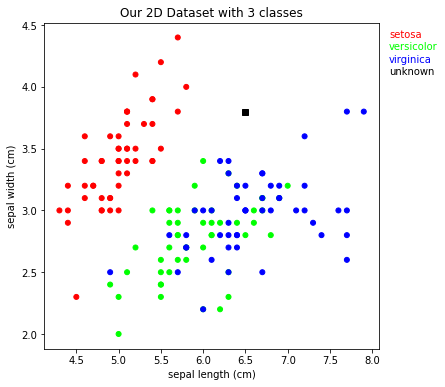

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y,s=25, cmap=cmap_bold)
plt.plot(X_pred[:,0], X_pred[:,1], 'ks')

# Make Custom Legend
for i in range(3):
  plt.text(8.2,4.4-0.1*i,data.target_names[i],color=colors_bold[i])
plt.text(8.2,4.1,'unknown',color='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Our 2D Dataset with 3 classes')

plt.show()

# Problem 2
Now consider the (unplottable) 4-feature original dataset.  Your job is to predict the given points using all 4 features by finding the nearest neighbor.

In [ ]:
# Generate new dataset to classify
means = X.mean(axis=0).reshape(1,-1)
X_pred, _ = datasets.make_blobs(n_samples=10, n_features=4, centers=means, cluster_std = 0.7, random_state=0  )

print('The points to classify:')
print(X_pred)

The points to classify:
[[7.43216157 2.03927736 3.79003096 1.06830464]
 [5.22188331 1.67077581 3.5144615  1.30877761]
 [7.07816998 3.33744338 4.44311659 2.76795857]
 [6.70453681 3.89899923 3.48687123 0.98772141]
 [6.91627878 4.08588447 3.8664632  1.4640471 ]
 [5.77108014 3.34475228 3.8588305  2.21732479]
 [7.15062393 2.37323882 4.42306189 1.09338329]
 [6.88918868 2.91372255 3.97714739 0.60146632]
 [4.05624046 3.51486635 4.36310534 0.67981782]
 [6.37605974 3.14250584 4.06870426 1.43290536]]


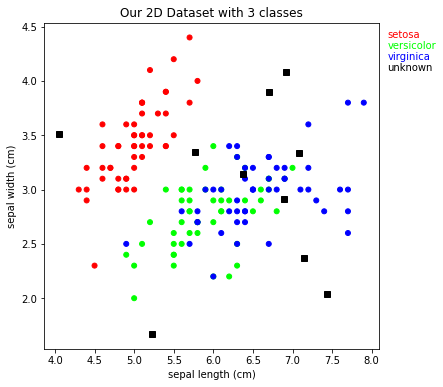

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y,s=25, cmap=cmap_bold)
plt.plot(X_pred[:,0], X_pred[:,1], 'ks')

# Make Custom Legend
for i in range(3):
  plt.text(8.2,4.4-0.1*i,data.target_names[i],color=colors_bold[i])
plt.text(8.2,4.1,'unknown',color='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Our 2D Dataset with 3 classes')

plt.show()

Good luck.  Have fun.

---
# HOMEWORK REPORT TEMPLATE
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Description
goes here

3 species and 4 features

## Solution Method


function that normalize and scale the features

choose 20% len(feature) as testing[ ] 80% as training[ ] (maybe consider do it 5 times in total). that's for choosing k

a function that take take the average length

use the training data, write a func that finds the smallest distance. input (testing_normed) return (result,which is the species).

use the training data to test the results.

(maybe do it for all k numbers)


## Input
Load and pre-process data

In [ ]:
data = datasets.load_iris()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

Features:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:	 ['setosa' 'versicolor' 'virginica']


## Analysis
Do all the work here


In [ ]:
def scale(X):
    """Scale the features to mean 0 STD 1"""
    Xscaled = np.zeros((len(X),4))
    for i in range(4):
      mean = sum(X[:,i])/len(X)
      std = np.std(X[:,i])
      print('for feature',i,': mean = ',mean,'  std = ',std) # to track the normalization / shifting constant
      for j in range(len(X)):
        Xscaled[j,i] = ((X[j,i]-mean)/std)
    return Xscaled

In [ ]:
def dist(a,b):
    """Returns the distance squared of numpy arrays, a is testing point"""
    dist2 = ((a-b)**2).sum()
    dist = np.sqrt(dist2)
    return dist

In [ ]:
#
newX = scale(X)
sample = newX[25]   # sample is the data that need to be classified
#print(sample)
close = 20
index = 0           # index = where it's stored in the arry

for i in range(len(X)):   # k = 1
  dis = dist(sample,newX[i])
  if close >= dis:
    close = dis
    index = i
print(close,"\n",index)
print('this is the species of',data.target_names[y[index]],'!')



'''
test = newX[15]
test2 = newX[16]
dis = dist(test,test2)
print(test,test2,'\n',dis)
print(sample)'''

for feature 0 : mean =  5.843333333333335   std =  0.8253012917851409
for feature 1 : mean =  3.057333333333334   std =  0.4344109677354946
for feature 2 : mean =  3.7580000000000027   std =  1.759404065775303
for feature 3 : mean =  1.199333333333334   std =  0.7596926279021594
0.0 
 25
this is the species of setosa !


"\ntest = newX[15]\ntest2 = newX[16]\ndis = dist(test,test2)\nprint(test,test2,'\n',dis)\nprint(sample)"

## Results
Produce the lovely plots and/or data tables that best visualization your solution

In [ ]:
X_pred_norm  = np.zeros((len(X_pred),4))

# scale the input dataset
for j in range(len(X_pred)):
  X_pred_norm[j,0] = ((X_pred[j,0]-5.843333333333335)/0.8253012917851409)
for j in range(len(X_pred)):
  X_pred_norm[j,1] = ((X_pred[j,1]-3.057333333333334)/0.4344109677354946)
for j in range(len(X_pred)):
  X_pred_norm[j,2] = ((X_pred[j,2]-3.7580000000000027)/1.759404065775303)
for j in range(len(X_pred)):
  X_pred_norm[j,3] = ((X_pred[j,3]-1.199333333333334)/0.7596926279021594)
#print(X_pred_norm)

# classification
for l in range(len(X_pred_norm)):
    index  = -1
    close  = 20
    for i in range(len(X)):
      dis = dist(X_pred_norm[l],newX[i])
      if close >= dis:
        close = dis
        index = i
    print('The',l,'th species is ',data.target_names[y[index]])

The 0 th species is  versicolor
The 1 th species is  versicolor
The 2 th species is  virginica
The 3 th species is  versicolor
The 4 th species is  versicolor
The 5 th species is  versicolor
The 6 th species is  versicolor
The 7 th species is  versicolor
The 8 th species is  setosa
The 9 th species is  versicolor


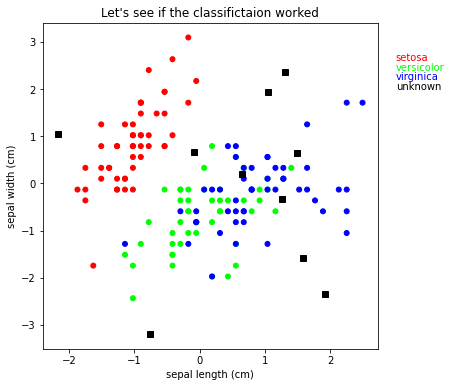

' Looks like the unknown species is setosa :) '

In [ ]:
''' Let's see if it works '''
# plot X_pred with the training data, after they are all sacaled

# Define Custom Colors
from matplotlib.colors import ListedColormap
colors_bold = ['#FF0000', '#00FF00', '#0000FF']
cmap_bold = ListedColormap(colors_bold)

plt.figure(figsize=(6,6))
plt.scatter(newX[:, 0], newX[:, 1], marker='o', c=y,s=25, cmap=cmap_bold)
plt.plot(X_pred_norm[:,0], X_pred_norm[:,1], 'ks')

for i in range(3):    # Make Custom Legend
  plt.text(3.0,2.6-0.2*i,data.target_names[i],color=colors_bold[i])
plt.text(3.0,2.0,'unknown',color='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Let's see if the classifictaion worked")

plt.show()

""" Looks like the unknown species is setosa :) """

## Discussion
Explain and interpret your results.  Explain how your results solve the problem.  Also describe anything interesting you discovered along the way, or lessons learned, or how you overcame problems you encountered.     

In [ ]:
''' YEAHHHHHH!!! '''

' YEAHHHHHH!!! '